In [1]:
import codecs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fitparse import FitFile

In [4]:
ff = FitFile(codecs.open("../data/8599886615_ACTIVITY.fit", "rb"))

In [5]:
for message in ff.get_messages("lap"):
    print(message.as_dict())
    break

{'name': 'lap', 'fields': [{'name': 'timestamp', 'def_num': 253, 'base_type': 'uint32', 'type': 'date_time', 'units': None, 'value': datetime.datetime(2022, 4, 8, 3, 15, 10), 'raw_value': 1018322110}, {'name': 'start_time', 'def_num': 2, 'base_type': 'uint32', 'type': 'date_time', 'units': None, 'value': datetime.datetime(2022, 4, 8, 3, 10, 10), 'raw_value': 1018321810}, {'name': 'start_position_lat', 'def_num': 3, 'base_type': 'sint32', 'type': 'sint32', 'units': 'semicircles', 'value': 652451944, 'raw_value': 652451944}, {'name': 'start_position_long', 'def_num': 4, 'base_type': 'sint32', 'type': 'sint32', 'units': 'semicircles', 'value': 301448429, 'raw_value': 301448429}, {'name': 'end_position_lat', 'def_num': 5, 'base_type': 'sint32', 'type': 'sint32', 'units': 'semicircles', 'value': 652481626, 'raw_value': 652481626}, {'name': 'end_position_long', 'def_num': 6, 'base_type': 'sint32', 'type': 'sint32', 'units': 'semicircles', 'value': 301338245, 'raw_value': 301338245}, {'name':

In [54]:
cntr = 0 
for message in ff.get_messages("lap"):
    print(message.get_value("Lap Power"))

231
252
343
253
327
242
324
259
328
168
333
179
308
199
328
167
309
155
339
166
308
150
361
209


In [25]:
from analysis import get_lap_data, make_figure

In [26]:
data = get_lap_data(FitFile(codecs.open("./data/8599886615_ACTIVITY.fit", "rb")))

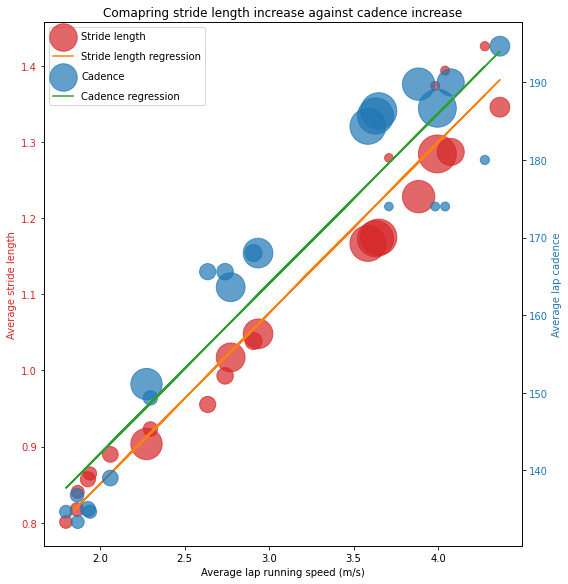

In [44]:
make_figure(data)
plt.show()

# Statistical testing

In [28]:
import statsmodels.api as sm

In [29]:
min_ = min(data['average_stride_length'])
max_ = max(data['average_stride_length'])

stride_st = (np.array(data['average_stride_length']) - min_)/ (max_ - min_)

In [30]:
min_ = min(data['average_cadence'])
max_ = max(data['average_cadence'])

cadence_st = (np.array(data['average_cadence']) - min_)/ (max_ - min_)

In [31]:
X = sm.add_constant(data["average_speed"])
model = sm.OLS(stride_st, X)
results = model.fit()
results.params

array([-0.63815721,  0.3590637 ])

In [32]:
X = sm.add_constant(data["average_speed"])
model = sm.OLS(cadence_st, X)
results = model.fit()
results.params

array([-0.57126719,  0.35739429])

In [33]:
results.resid * results.resid

array([0.00543038, 0.00766191, 0.03858813, 0.01394615, 0.00832925,
       0.02399569, 0.04421644, 0.00944434, 0.03579315, 0.0014741 ,
       0.0001609 , 0.00531895, 0.01476964, 0.00011761, 0.01062554,
       0.00821109, 0.01723073, 0.00928242, 0.00150532, 0.01013968,
       0.01617648, 0.00245903, 0.00011846, 0.00230992])

## With cadence scaled - `/100`

In [34]:
cadence_sc = np.array(data['average_cadence']) / 100.0

In [35]:
X = sm.add_constant(data["average_speed"])
model = sm.OLS(cadence_sc, X)
results = model.fit()
results.params

array([0.98295612, 0.21920183])

In [36]:
model = sm.OLS(data['average_stride_length'], X)
results = model.fit()
results.params

array([0.40216079, 0.2243763 ])

# Pace to speed conversion

In [40]:
KM_M = 1000.0
MIN_SEC = 60.0
pace_to_speed = {}
for m_p_k in range(7, 2, -1):
    pace_to_speed[m_p_k] = KM_M / (m_p_k * MIN_SEC)

In [41]:
pace_to_speed

{7: 2.380952380952381,
 6: 2.7777777777777777,
 5: 3.3333333333333335,
 4: 4.166666666666667,
 3: 5.555555555555555}